In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np #
import pandas as pd #



import os
print(os.listdir("../input"))



['train.csv', 'sample_submission.csv', 'test.csv']


In [115]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [116]:
train_df = train_df.fillna(0)
train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [117]:
one_df = train_df[train_df['Target'] == 1]
two_df = train_df[train_df['Target'] == 2]
three_df = train_df[train_df['Target'] == 3]
four_df = train_df[train_df['Target'] == 4]
print(len(one_df), len(two_df), len(three_df), len(four_df))

755 1597 1209 5996


In [118]:
one_df= one_df.sample(len(four_df), replace = True)
two_df= two_df.sample(len(four_df), replace = True)
three_df= three_df.sample(len(four_df), replace = True)
four_df= four_df.sample(len(four_df), replace = True)
print(len(one_df), len(two_df), len(three_df), len(four_df))

5996 5996 5996 5996


In [119]:
new_training_df = pd.concat([one_df, two_df, three_df, four_df], axis = 0)
new_training_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
4827,ID_08705caa3,0.0,0,5,0,1,1,0,0.0,0,1,1,0,2,2,0,3,3,3,3,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,2.0,1,0,0,0,0,0,0,0,0,1,3.0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,45,0,2025,9,4,0,9.00,4.00,4.00,2025,1
6717,ID_cf86d19a3,200000.0,1,6,0,1,1,0,0.0,1,0,1,3,3,6,4,3,7,7,7,0,0.0,7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,1,0,0,0,0,0,0,0,0,2,3.5,0,0,1,0,0,0,0,1,3,0,0,1,0,0,0,1,0,1,0,1,49,0,36,12.25,36.00,121.00,1,1
9307,ID_ce6435b64,0.0,0,6,0,1,0,0,0.0,2,3,5,0,1,1,2,4,6,6,6,0,0.0,6,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,3.5,1,0,0,0,0,0,0,0,0,3,2.0,1,0,0,0,0,0,0,1,3,0,0,0,0,0,1,0,1,0,0,0,36,36,4,4.00,0.25,12.25,0,1
6419,ID_1593e39a2,50000.0,0,6,0,1,1,0,0.0,0,2,2,0,1,1,0,3,3,3,3,10,0.0,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,6.5,0,0,0,1,0,0,0,0,0,2,1.5,0,0,1,0,0,0,0,1,2,0,1,0,0,0,0,0,1,17,100,289,9,36,1,2.25,0.25,42.25,289,1
6717,ID_cf86d19a3,200000.0,1,6,0,1,1,0,0.0,1,0,1,3,3,6,4,3,7,7,7,0,0.0,7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,1,0,0,0,0,0,0,0,0,2,3.5,0,0,1,0,0,0,0,1,3,0,0,1,0,0,0,1,0,1,0,1,49,0,36,12.25,36.00,121.00,1,1


In [132]:
non_inputs = ['Id', 'Target']

train_x = new_training_df[[c for c in new_training_df if c not in non_inputs]]
train_y = new_training_df[['Target']]

In [133]:
Counter(train_x.dtypes)

Counter({dtype('float64'): 8, dtype('int64'): 129, dtype('O'): 4})

In [134]:
train_x = train_x[[c for c in train_x if train_x[c].dtype != 'O']]
train_y = train_y[[c for c in train_y if train_y[c].dtype != 'O']]

In [135]:
train_x

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,...,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
4827,0.0,0,5,0,1,1,0,0.0,0,1,1,0,2,2,0,3,3,3,3,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,3,2.000000,1,0,0,0,0,0,0,0,0,1,3.000000,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,45,0,2025,9,4,0,9.000000,4.000000,4.000000,2025
6717,200000.0,1,6,0,1,1,0,0.0,1,0,1,3,3,6,4,3,7,7,7,0,0.0,7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,7,11.000000,1,0,0,0,0,0,0,0,0,2,3.500000,0,0,1,0,0,0,0,1,3,0,0,1,0,0,0,1,0,1,0,1,49,0,36,12.250000,36.000000,121.000000,1
9307,0.0,0,6,0,1,0,0,0.0,2,3,5,0,1,1,2,4,6,6,6,0,0.0,6,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,6,3.500000,1,0,0,0,0,0,0,0,0,3,2.000000,1,0,0,0,0,0,0,1,3,0,0,0,0,0,1,0,1,0,0,0,36,36,4,4.000000,0.250000,12.250000,0
6419,50000.0,0,6,0,1,1,0,0.0,0,2,2,0,1,1,0,3,3,3,3,10,0.0,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,3,6.500000,0,0,0,1,0,0,0,0,0,2,1.500000,0,0,1,0,0,0,0,1,2,0,1,0,0,0,0,0,1,17,100,289,9,36,1,2.250000,0.250000,42.250000,289
6717,200000.0,1,6,0,1,1,0,0.0,1,0,1,3,3,6,4,3,7,7,7,0,0.0,7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,7,11.000000,1,0,0,0,0,0,0,0,0,2,3.500000,0,0,1,0,0,0,0,1,3,0,0,1,0,0,0,1,0,1,0,1,49,0,36,12.250000,36.000000,121.000000,1
6213,0.0,1,4,0,1,1,0,0.0,1,2,3,3,1,4,4,3,7,7,8,0,0.0,7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,7,3.000000,1,0,0,0,0,0,0,0,0,2,4.000000,0,0,0,0,1,0,0,1,2,0,1,0,0,0,0,0,1,1,0,1,49,9,25,16.000000,6.250000,9.000000,1
1468,0.0,0,5,0,1,1,0,0.0,0,1,1,0,1,1,0,2,2,2,2,6,0.0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,2,10.500000,0,0,1,0,0,0,0,0,0,3,0.666667,1,0,0,0,0,0,0,1,2,1,0,0,0,0,0,1,0,40,36,1600,4,36,0,0.444444,0.000000,110.250000,1600
1451,150000.0,0,6,0,1,1,0,0.0,1,1,2,1,2,3,2,3,5,5,5,0,0.0,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,5,10.000000,1,0,0,0,0,0,0,0,0,3,1.666667,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,6,0,36,25,121,9,2.777778,2.250000,100.000000,36
5227,0.0,0,6,0,1,1,0,0.0,0,2,2,0,1,1,0,3,3,3,3,4,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,3,6.333334,0,1,0,0,0,0,0,0,0,3,1.000000,1,0,0,0,0,0,0,1,3,1,0,0,0,0,0,0,1,64,16,4096,9,16,0,1.000000,0.250000,40.111115,4096
7266,100000.0,0,6,0,1,1,1,1.0,0,0,0,3,2,5,3,2,5,5,5,7,0.0,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,5,11.000000,0,0,0,0,0,1,0,0,0,3,1.666667,0,0,1,0,0,0,0,1,2,0,0,0,1,0,0,1,0,13,49,169,25,0,16,2.777778,16.000000,121.000000,169


In [142]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=12, random_state=0, n_estimators=15)
clf.fit(train_x, train_y)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf='deprecated', min_samples_split=2,
            min_weight_fraction_leaf='deprecated', n_estimators=15,
            n_jobs=None, oob_score=False, random_state=0, verbose=0,
            warm_start=False)

In [143]:
from collections import Counter
from sklearn.metrics import classification_report
predictions = list(clf.predict(train_x))
true = train_y['Target'].tolist()

print(classification_report(true, predictions))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98      5996
           2       0.97      0.95      0.96      5996
           3       0.95      0.98      0.96      5996
           4       0.95      0.93      0.94      5996

   micro avg       0.96      0.96      0.96     23984
   macro avg       0.96      0.96      0.96     23984
weighted avg       0.96      0.96      0.96     23984



Feature ranking:
1. feature 135 (0.133427)
2. feature 71 (0.117693)
3. feature 94 (0.110302)
4. feature 98 (0.106986)
5. feature 132 (0.087374)
6. feature 133 (0.085532)
7. feature 134 (0.069271)
8. feature 131 (0.044251)
9. feature 128 (0.039443)
10. feature 7 (0.038602)
11. feature 65 (0.033965)
12. feature 14 (0.033726)
13. feature 19 (0.024186)
14. feature 0 (0.020783)
15. feature 40 (0.020518)
16. feature 125 (0.015101)
17. feature 57 (0.009945)
18. feature 30 (0.008894)
19. feature 11 (0.000000)
20. feature 12 (0.000000)
21. feature 39 (0.000000)
22. feature 5 (0.000000)
23. feature 41 (0.000000)
24. feature 42 (0.000000)
25. feature 43 (0.000000)
26. feature 44 (0.000000)
27. feature 45 (0.000000)
28. feature 46 (0.000000)
29. feature 47 (0.000000)
30. feature 48 (0.000000)
31. feature 49 (0.000000)
32. feature 50 (0.000000)
33. feature 51 (0.000000)
34. feature 52 (0.000000)
35. feature 53 (0.000000)
36. feature 54 (0.000000)
37. feature 55 (0.000000)
38. feature 4 (0.000000)
3

<Figure size 432x288 with 0 Axes>

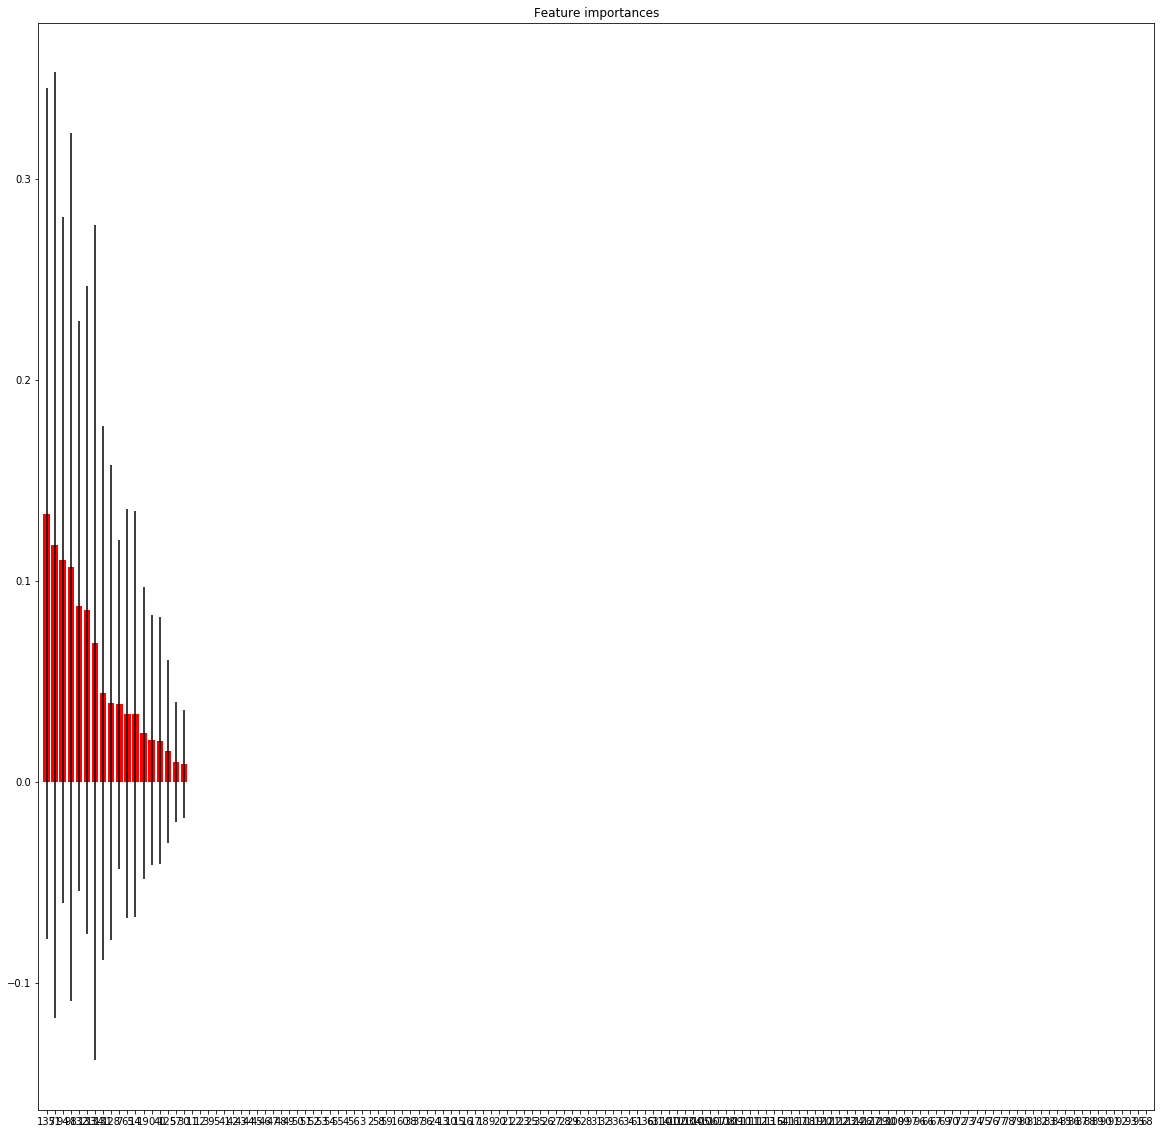

In [52]:
import matplotlib.pyplot as plt
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
import_features = []
for f in range(train_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    import_features.append(indices[f])

# Plot the feature importances of the forest
plt.figure()
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_x.shape[1]), indices)
plt.xlim([-1, train_x.shape[1]])
plt.show()

In [104]:
test_df = test_df.fillna(0)

In [106]:
test_x = test_df[[c for c in test_df if c not in non_inputs]]
test_x.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,...,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,3,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,3,16,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,3,17,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,0.0,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,11,0.0,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,0.00,324


In [112]:
test_x = test_x[[c for c in test_x if test_x[c].dtype != 'O']]
test_x

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,...,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,3,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,3,16.500000,1,0,0,0,0,0,0,0,0,2,1.500000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.250000,0.25,272.250000,16
1,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,3,16,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,3,16.500000,0,0,0,0,0,0,0,1,0,2,1.500000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.250000,0.25,272.250000,1681
2,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,3,17,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,3,16.500000,0,0,0,0,0,0,0,0,1,2,1.500000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.250000,0.25,272.250000,1681
3,0.0,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,1,16.000000,0,0,0,0,0,0,0,1,0,1,1.000000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.000000,0.00,256.000000,3481
4,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,1,0.000000,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.250000,64.00,0.000000,324
5,400000.0,0,3,0,1,1,1,1.0,0,0,0,0,2,2,0,2,2,2,2,16,0.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,...,2,13.500000,0,0,0,0,0,0,0,1,0,2,1.000000,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,38,256,1444,4,0,0,1.000000,0.00,182.250000,1444
6,400000.0,0,3,0,1,1,1,1.0,0,0,0,0,2,2,0,2,2,2,2,11,0.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,...,2,13.500000,0,0,0,0,1,0,0,0,0,2,1.000000,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,42,121,1764,4,0,0,1.000000,0.00,182.250000,1764
7,300000.0,0,6,0,1,1,1,1.0,0,0,0,0,2,2,0,2,2,2,2,14,0.0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,2,14.000000,0,0,0,0,0,0,0,1,0,4,0.500000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,21,196,441,4,0,0,0.250000,0.00,196.000000,441
8,300000.0,0,6,0,1,1,1,1.0,0,0,0,0,2,2,0,2,2,2,2,14,0.0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,2,14.000000,0,0,0,0,0,0,0,1,0,4,0.500000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,22,196,484,4,0,0,0.250000,0.00,196.000000,484
9,0.0,0,6,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,10,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,1,10.000000,0,0,0,1,0,0,0,0,0,3,0.333333,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,70,100,4900,1,0,0,0.111111,64.00,100.000000,4900


In [145]:
Counter(clf.predict(test_x))

Counter({4: 13938, 3: 3338, 2: 4511, 1: 2069})

In [149]:
ids = test_df['Id'].tolist()
targets = list(clf.predict(test_x))

In [151]:
submission = pd.DataFrame(list(zip(ids, targets)), columns=['Id', 'Target'])

In [154]:
submission.to_csv('sample_submission.csv', index=False)